# Quetsion#1
Look for an image from the internet with the following properties: 8-bit gray-level, 
256x256 pixels in size. 

## 1- Show this image. Don’t use your friends’ ones.

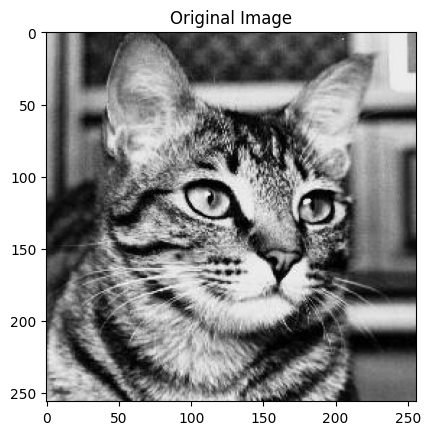

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cat256.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


## 2- Apply a power law transformation with gamma=0.4 to the image and show the image after the transformation.

### A power law transformation can be applied to the image using the formula s = c * r^gamma, where r is the input pixel value, gamma is the power-law exponent, and c is a constant. For gamma = 0.4

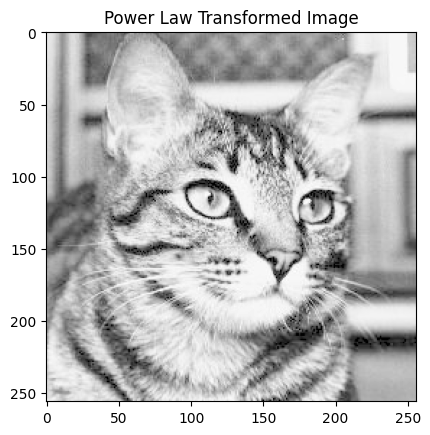

In [2]:
import numpy as np

gamma = 0.4
c = 255 / (255 ** gamma)  # Normalizing to keep values in 0-255 range

# Apply the transformation
power_law_image = c * np.power(image, gamma)

# Display the transformed image
plt.imshow(power_law_image, cmap='gray')
plt.title('Power Law Transformed Image')
plt.show()


## 3- Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the original image and show the resulting image:

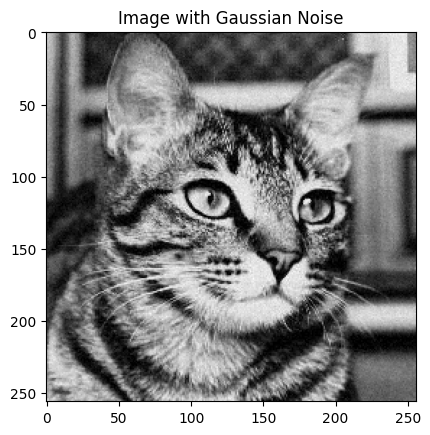

In [3]:
mean = 0
variance = 40
sigma = variance ** 0.5

# Generate Gaussian noise
gaussian_noise = np.random.normal(mean, sigma, image.shape)

# Add noise to the image
noisy_image = np.clip(image + gaussian_noise, 0, 255)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.show()


## 4- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 aboveand show the result. Discuss the results in your report.

### we can use OpenCV's blur function to apply a 5x5 mean filter. This function calculates the mean of the pixel values in the kernel area and replaces the central element with this mean value. 

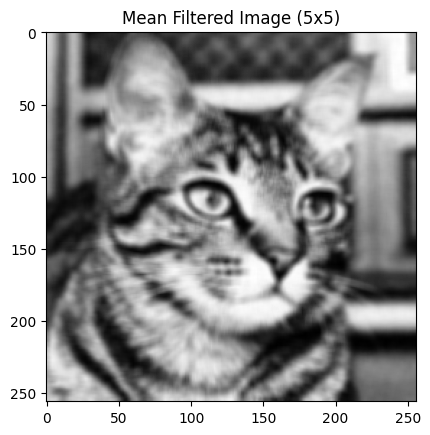

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply the 5x5 mean filter
mean_filtered_image = cv2.blur(noisy_image, (5, 5))

# Display the mean filtered image
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Mean Filtered Image (5x5)')
plt.show()


## 5- Add salt and pepper noise (noise-density=0.1) to the original image and then apply a 7 by 7 median filter to the noisy-image and show both images.

### Salt and pepper noise is characterized by sporadic white and black pixels. To add this type of noise and then apply a median filter, we can use the following approach:

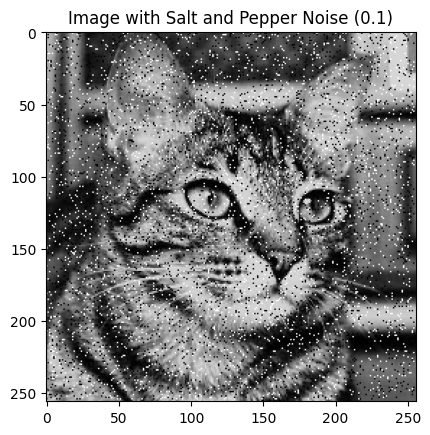

In [5]:
import random

def add_salt_and_pepper_noise(image, noise_density=0.1):
    output = np.copy(image)
    # Salt noise
    num_salt = np.ceil(noise_density * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    output[tuple(coords)] = 255

    # Pepper noise
    num_pepper = np.ceil(noise_density * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    output[tuple(coords)] = 0

    return output

# Apply salt and pepper noise
sp_noisy_image = add_salt_and_pepper_noise(image)

# Display the image with salt and pepper noise
plt.imshow(sp_noisy_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise (0.1)')
plt.show()


### Applying 7x7 Median Filter:

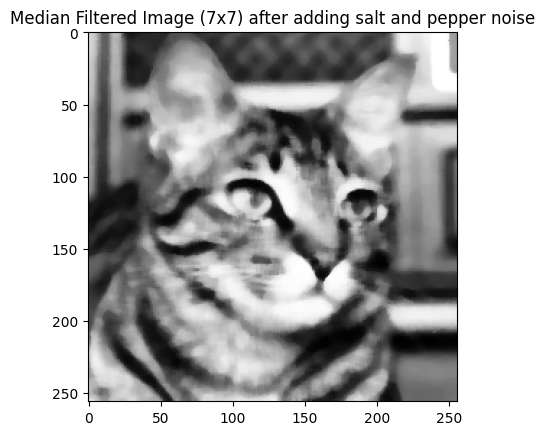

In [6]:
# Apply the 7x7 median filter
median_filtered_image = cv2.medianBlur(sp_noisy_image, 7)

# Display the median filtered image
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image (7x7) after adding salt and pepper noise')
plt.show()

## 6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the result. Discuss the results in your report.

### To apply a 7x7 mean filter, we can use a similar approach as with the 5x5 mean filter but change the kernel size:

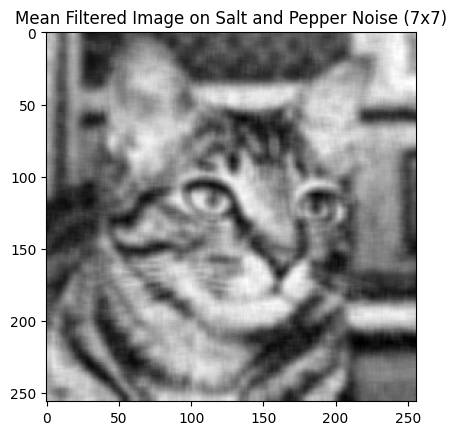

In [7]:
# Apply the 7x7 mean filter
mean_filtered_sp_image = cv2.blur(sp_noisy_image, (7, 7))

# Display the mean filtered image
plt.imshow(mean_filtered_sp_image, cmap='gray')
plt.title('Mean Filtered Image on Salt and Pepper Noise (7x7)')
plt.show()

## 7- Apply a Sobel filter to the original image and show the response (don’t use ready functions to do this part).

### For the Sobel filter, since we can not use ready functions, we'll need to manually define the Sobel kernels and perform convolution:


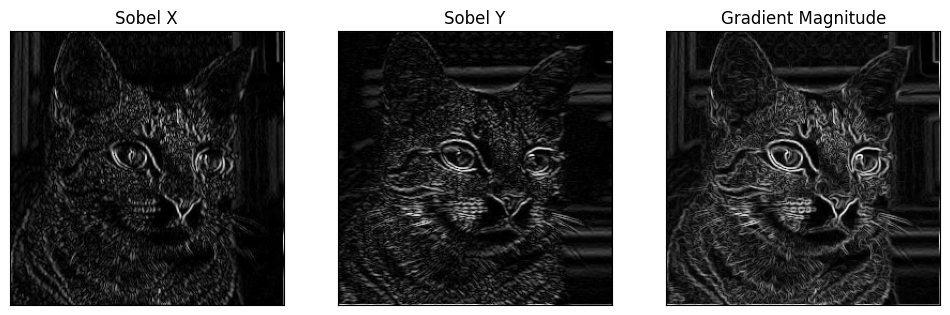

In [8]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cat256.jpg', 0)
if image is None:
    print("Error loading image")
    exit()

# Pad the image
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Sobel kernels
sobelx = np.asarray([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])
sobely = np.asarray([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

# Get the dimensions of the padded image
N, M = padded_image.shape

# Initialize arrays for Sobel images
sobelxImage = np.zeros((N-2, M-2))
sobelyImage = np.zeros((N-2, M-2))
sobelGrad = np.zeros((N-2, M-2))

# Processing loop
for i in range(1, N-1):
    for j in range(1, M-1):  
        # Calculate gx and gy using Sobel (horizontal and vertical gradients)
        gx = np.sum(sobelx * padded_image[i-1:i+2, j-1:j+2])
        gy = np.sum(sobely * padded_image[i-1:i+2, j-1:j+2])

        # Store absolute values of gradients
        sobelxImage[i-1, j-1] = abs(gx)
        sobelyImage[i-1, j-1] = abs(gy)

        # Calculate and store gradient magnitude
        mag_gradient = math.sqrt(gx**2 + gy**2)
        sobelGrad[i-1, j-1] = mag_gradient

# Contrast stretching normalization
def normalize(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized = (image - min_val) / (max_val - min_val) * 255
    return normalized.astype(np.uint8)

# Apply normalization
norm_sobelx = normalize(sobelxImage)
norm_sobely = normalize(sobelyImage)
norm_sobelGrad = normalize(sobelGrad)

# Display images using matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(norm_sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('on')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(norm_sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('on')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(norm_sobelGrad, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('on')
plt.xticks([]), plt.yticks([])

plt.show()
